In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


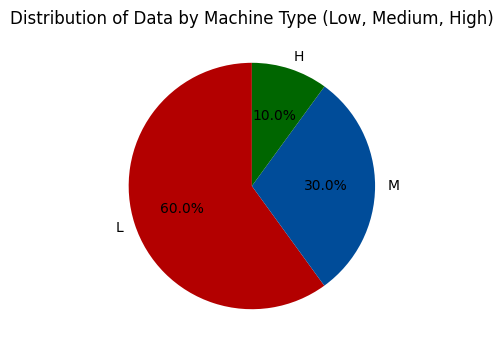

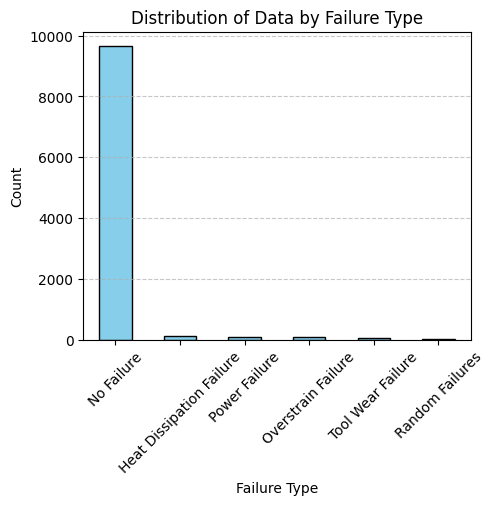

In [ ]:
product_distribution = df['Type'].value_counts()
labels = product_distribution.index
sizes = product_distribution.values

plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#b30000', '#004c99', '#006600'])
plt.title('Distribution of Data by Machine Type (Low, Medium, High)')
plt.show()

failure_distribution = df['Failure Type'].value_counts()

plt.figure(figsize=(5, 4))
failure_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Data by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


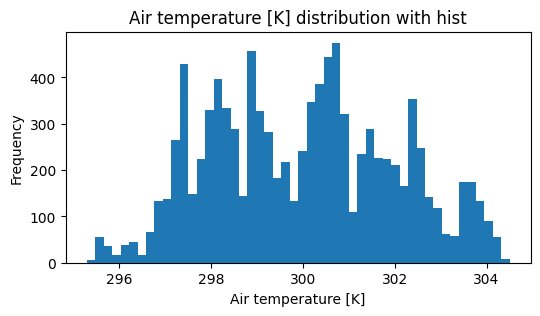

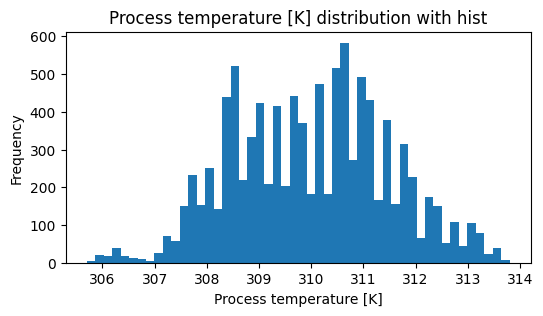

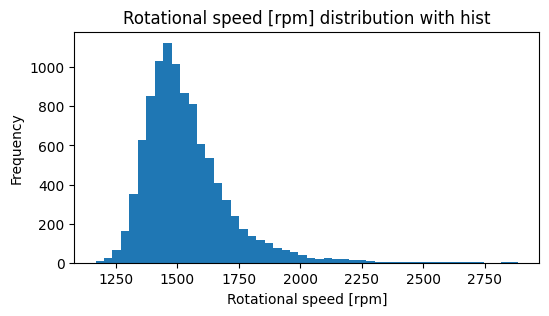

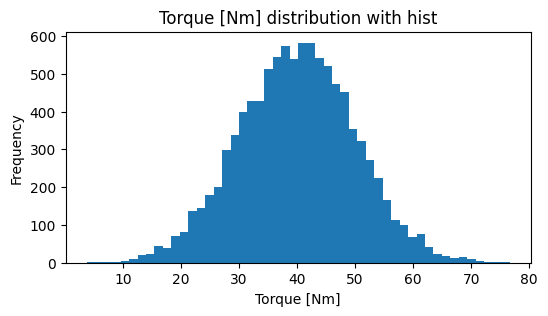

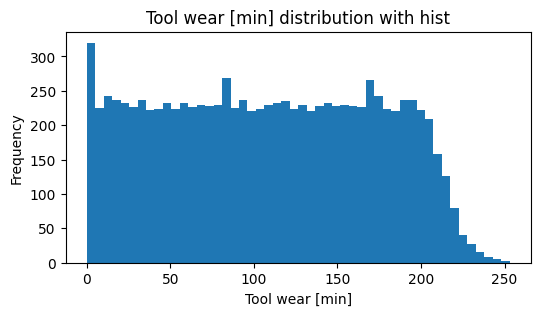

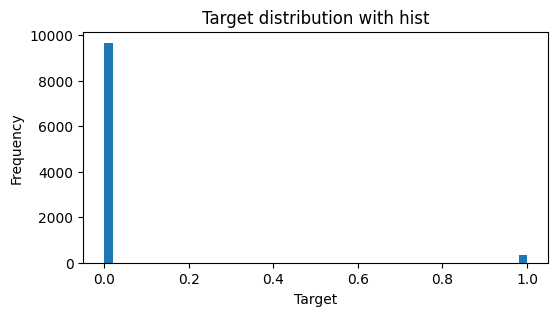

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (6, 3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
category1 = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
for c in category1:
    plot_hist(c)

In [ ]:
df = df.drop(columns=['UDI', 'Product ID', 'Target'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [ ]:
pd.set_option('future.no_silent_downcasting', True)
df['Type'] = df['Type'].replace(to_replace=[i for i in df['Type'].unique()],
                                value=[i for i in range(3)], inplace=False).astype(int)
df['Failure Type'] = df['Failure Type'].replace(to_replace=[i for i in df['Failure Type'].unique()],
                                value=[i for i in range(6)], inplace=False).astype(int)

In [ ]:
print(df['Failure Type'].value_counts())

Failure Type
0    9652
5     112
1      95
3      78
2      45
4      18
Name: count, dtype: int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Apply random oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine X_resampled and y_resampled back into a DataFrame if needed
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


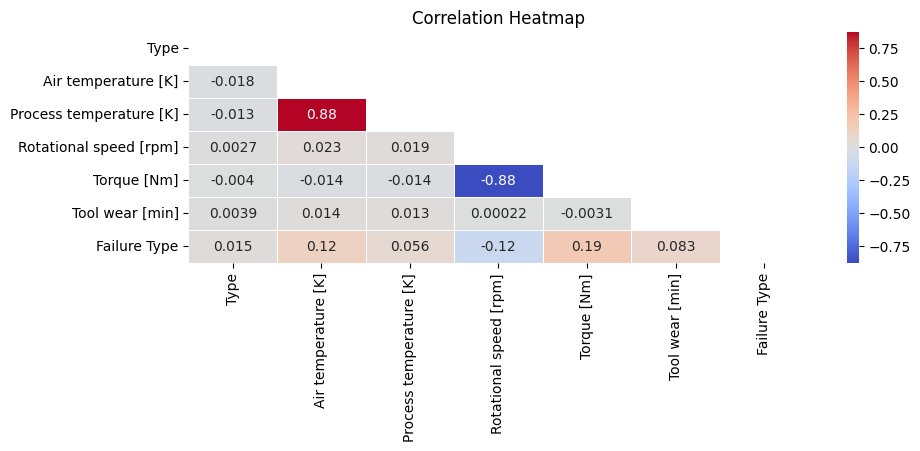

In [ ]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(df_resampled.columns)


Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')


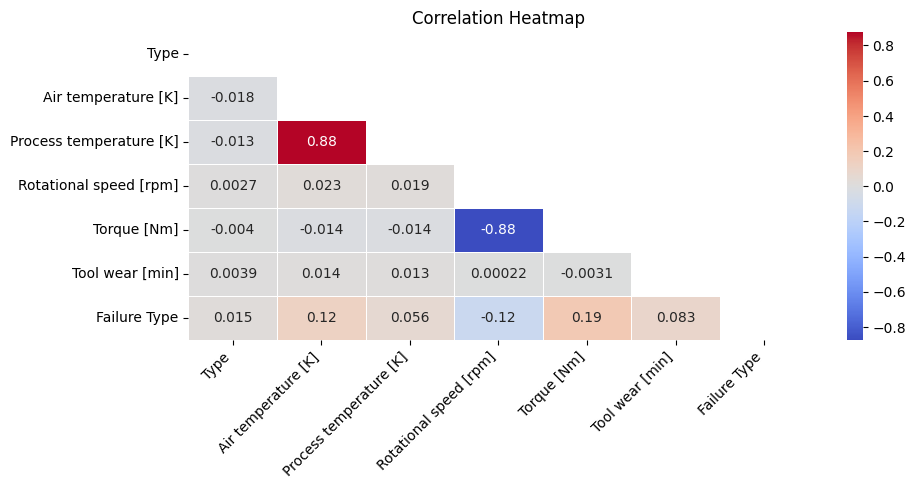

In [ ]:
df_resampled['temp_diff'] = df_resampled['Process temperature [K]'] - df_resampled['Air temperature [K]']
df_resampled['temp_ratio'] = df_resampled['Process temperature [K]'] / df_resampled['Air temperature [K]']
df_resampled['rpm_diff'] = df_resampled['Torque [Nm]'] - df_resampled['Rotational speed [rpm]']
df_resampled['rpm_ratio'] = df_resampled['Torque [Nm]'] / df_resampled['Rotational speed [rpm]']
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()

In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57912 entries, 0 to 57911
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     57912 non-null  int64  
 1   Air temperature [K]      57912 non-null  float64
 2   Process temperature [K]  57912 non-null  float64
 3   Rotational speed [rpm]   57912 non-null  int64  
 4   Torque [Nm]              57912 non-null  float64
 5   Tool wear [min]          57912 non-null  int64  
 6   Failure Type             57912 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.1 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB



In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_resampled.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_resampled.columns.values]
df_resampled.columns = df_resampled.columns.str.replace(' ', '_')

X = df_resampled.drop('Failure_Type', axis=1)
y = df_resampled['Failure_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(57912, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('Naive Bayes', GaussianNB()),
]

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)


    accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled,y_test)
    results.append([name, accuracy * 100, precision * 100, recall * 100, f1 * 100])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision', 'Recall', 'F1 Score'])
display(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,86.566520,86.030524,86.566520,86.179017
1,K-Nearest Neighbors,97.427264,97.518160,97.427264,97.355669
2,SVC,96.235863,96.466988,96.235863,96.116632
3,Decision Tree,98.963999,98.965394,98.963999,98.959624
4,Random Forest,99.300699,99.306442,99.300699,99.296991
5,XGBClassifier,99.499266,99.502447,99.499266,99.497350
6,Naive Bayes,78.114478,78.314502,78.114478,77.581173


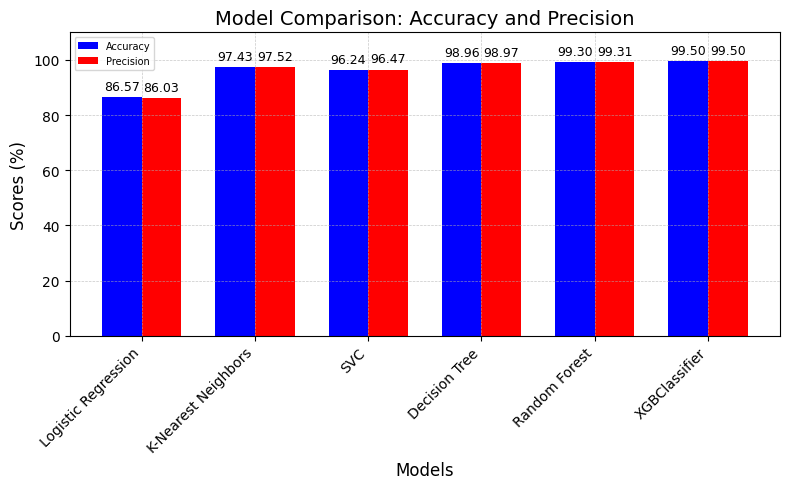

In [ ]:
# Extract accuracy and precision of the first six algorithms
selected_models = results_df.iloc[:6]
models = selected_models['Model']
accuracy = selected_models['Accuracy']
precision = selected_models['Precision']

# Define the bar width
bar_width = 0.35

# Create positions for the bars
x = np.arange(len(models))

# Plot the bars
fig, ax = plt.subplots(figsize=(8, 5))  # Adjusted height to balance the plot

# Bars for accuracy
bar1 = ax.bar(x - bar_width/2, accuracy, bar_width, label='Accuracy', color='blue')

# Bars for precision
bar2 = ax.bar(x + bar_width/2, precision, bar_width, label='Precision', color='red')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores (%)', fontsize=12)
ax.set_title('Model Comparison: Accuracy and Precision', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=7)

# Add grid to the plot
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust y-axis limits for better visibility
ax.set_ylim(0, 110)

# Annotate the bars with values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()
